# Classiying Palmer Penguins
In this blog post, I will be training some machine learning models on the Palmer Penguins data set. The goal is to find a model trained with three of the features in the data set that achieves 100% testing accuracy. 

## 1. Explore
Here is an overview of the Palmer Penguins data set: 

In [2]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


Upon intuition, I am guessing that the species of a penguin might be related to which island they live on and their physiological measures. To test my guess, I will make some tables and figures using these variables.

### Island and species

In [3]:
train.groupby(["Species", "Island"])[["Island"]].count()

Island
Species                                   Island           
Adelie Penguin (Pygoscelis adeliae)       Biscoe         35
                                          Dream          41
                                          Torgersen      42
Chinstrap penguin (Pygoscelis antarctica) Dream          56
Gentoo penguin (Pygoscelis papua)         Biscoe        101

There is a clear pattern in the island that different species of penguins inhabit. Adelie is found on all three islands, whereas Chinstrap is only found on Dream and Gentoo is only found on Biscoe. 

### Physiological measures

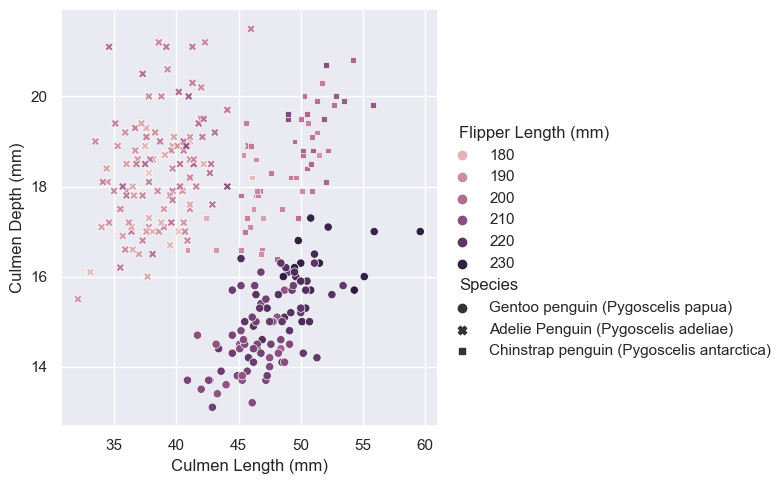

In [4]:
import seaborn as sns

sns.set_theme()

sns.relplot(data = train, 
            x = "Culmen Length (mm)", 
            y = "Culmen Depth (mm)", 
            hue = "Flipper Length (mm)",
            style = "Species")


This figure shows the relationship between three of the physiological measures of a penguin (culmen depth, culmen length, flipper length) and their species. 

The three species form nice clusters on the graph. This tells us that we can do a good job predicting them using culmen depth and length, as we can separate species using the x and y coordinates easily. 

There is also a pattern in the color of the clusters: Gentoo has the deepest colors, followed by Chinstrap. Therefore, flipper length is also likely correlated with species. 

## 2. Model
### Data preparation
I start by preparing the training data using the code provided by Professor Phil:

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,41.1,17.5,190.0,3900.0,8.94365,-26.06943,0,1,0,1,0,1,0,1
270,45.4,14.6,211.0,4800.0,8.24515,-25.46782,1,0,0,1,0,1,1,0
271,36.2,17.2,187.0,3150.0,9.04296,-26.19444,0,0,1,1,1,0,1,0
272,50.0,15.9,224.0,5350.0,8.20042,-26.39677,1,0,0,1,0,1,0,1


### Choosing features
#### Logistic regression
In the following for-loops, I train and score all possible combinations of 1 qualitative + 2 quantitative features using cross-validation. I choose to start with the logistic regression model. 

In [59]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Stage"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 
                 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

cv_max = 0;
best_features = [];

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    
    # fit model
    LR = LogisticRegression()
    LR.fit(X_train[cols], y_train)
    
    # cross-validation
    cv_scores = cross_val_score(LR, X_train[cols], y_train, cv = 5)
    cv_mean = cv_scores.mean()
    
    # update top 3 cv scores and best features list
    if cv_mean > cv_max:
        cv_max = cv_mean
        best_features = cols;
    
    
print("Best CV score = ", cv_max)
print("Best features = ", best_features)


Best CV score =  0.996078431372549
Best features =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


It seems that the best cross-validation score we can get using logistic regression is 0.996. 

Next, I will try a few other machine learning models and see if we can get even higher scores. 
#### Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

cv_max = 0
best_features = []
best_depth = 0

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    
    for d in range(2, 30):
        # fit model
        DTC = DecisionTreeClassifier(max_depth = d)
        DTC.fit(X_train[cols], y_train)

        # cross-validation
        cv_scores = cross_val_score(DTC, X_train[cols], y_train, cv = 5)
        cv_mean = cv_scores.mean()

        # update top 3 cv scores and best features list
        if cv_mean > cv_max:
            cv_max = cv_mean
            best_features = cols
            best_depth = d
    
    
print("Best CV score = ", cv_max)
print("Best features = ", best_features)
print("Best max depth = ", best_depth)

Best CV score =  0.9803921568627452
Best features =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
Best max depth =  4


Using the decision tree method, the best CV score we can achieve is 0.98, a little lower than with logistic regression. The best features are the same as what we got from searching through logistic regression models. The max depth that would allow the best CV score turns out to be 4.

#### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

cv_max = 0;
best_features = [];

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    
    # fit model
    RF = RandomForestClassifier()
    RF.fit(X_train[cols], y_train)
    
    # cross-validation
    cv_scores = cross_val_score(RF, X_train[cols], y_train, cv = 5)
    cv_mean = cv_scores.mean()
    
    # update top 3 cv scores and best features list
    if cv_mean > cv_max:
        cv_max = cv_mean
        best_features = cols;
    
    
print("Best CV score = ", cv_max)
print("Best features = ", best_features)

Best CV score =  0.9843137254901961
Best features =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


We again get the same set of best features from searching all possible random forest models. The best CV score is very close to what we got from the decision tree classifiers.

#### Support vector machine

In [67]:
from sklearn.svm import SVC

cv_max = 0
best_features = []
best_gamma = 0

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    
    for g in np.float_power(10, np.arange(-5, 5)):
        # fit model
        SVC_ = SVC(gamma = g)
        SVC_.fit(X_train[cols], y_train)

        # cross-validation
        cv_scores = cross_val_score(SVC_, X_train[cols], y_train, cv = 5)
        cv_mean = cv_scores.mean()

        # update top 3 cv scores and best features list
        if cv_mean > cv_max:
            cv_max = cv_mean
            best_features = cols
            best_gamma = g
    
    
print("Best CV score = ", cv_max)
print("Best features = ", best_features)
print("Best gamma = ", best_gamma)

Best CV score =  0.984389140271493
Best features =  ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']
Best gamma =  0.1


Finally, I search through all possible feature combinations and gamma values from $10^{-5}$ to $10^5$. The best model turns out to be trained with the same set of features as the rest of the models, with gamma = 0.1. 

#### Summary

It seems that with any of the four models, the most predictive features are always culmen length, culmen depth, and island. I wonder if this applies to other machine learning models in general -- is there always a set of "best" features to use regardless of the model choice? 

Comparing the cross-validation scores of all four models, it looks like they have similar performance. Logistic regression is slightly outperforming the rest. Next, I will try applying the best candidates from each of the four model types to testing data and see if they have similar testing accuracy as well. 

### Testing

In [90]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

LR = LogisticRegression()
LR.fit(X_train[best_features], y_train)
print("Logistic regression: ", LR.score(X_test[best_features], y_test))
      
DTC = DecisionTreeClassifier(max_depth = best_depth)
DTC.fit(X_train[best_features], y_train)
print("Decision tree: ", DTC.score(X_test[best_features], y_test))

RF = RandomForestClassifier()
RF.fit(X_train[best_features], y_train)
print("Random forest: ", RF.score(X_test[best_features], y_test))
      
SVC_ = SVC(gamma = best_gamma)
SVC_.fit(X_train[best_features], y_train)
print("SVC: ", SVC_.score(X_test[best_features], y_test))


Logistic regression:  1.0
Decision tree:  0.9852941176470589
Random forest:  0.9852941176470589
SVC:  0.9558823529411765


With the testing data, we reached 1.0 accuracy using logistic regression. 

The decision tree and random forest models also had pretty good accuracy, close to what the cross-validation scores suggest. 

The accuracy from SVC is a little lower than anticipated since the CV score from training data is higher by ~0.03. 

## 3. Evaluate
Finally, I will plot the decision regions of all four selected models. I will compare them and try to understand what makes logistic regression the best of them with this data set.

In [70]:
from matplotlib import pyplot as plt

In [81]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

### Logistic regression

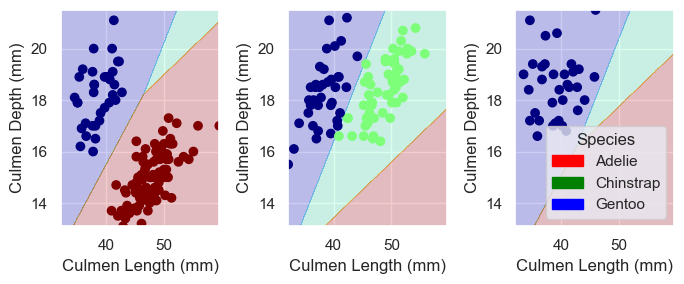

In [ ]:
plot_regions(LR, X_train[best_features], y_train)
plt.show()

### Decision tree

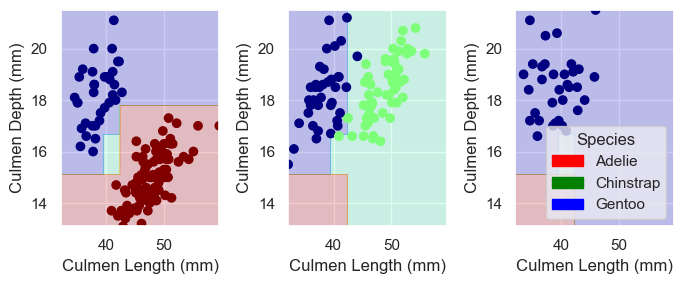

In [83]:
plot_regions(DTC, X_train[best_features], y_train)
plt.show()

### Random forest

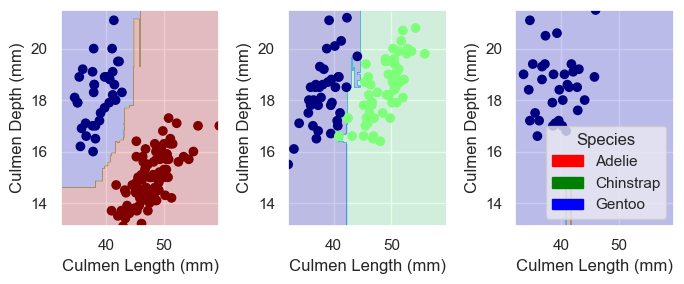

In [85]:
plot_regions(RF, X_train[best_features], y_train)
plt.show()

### Support vector machine

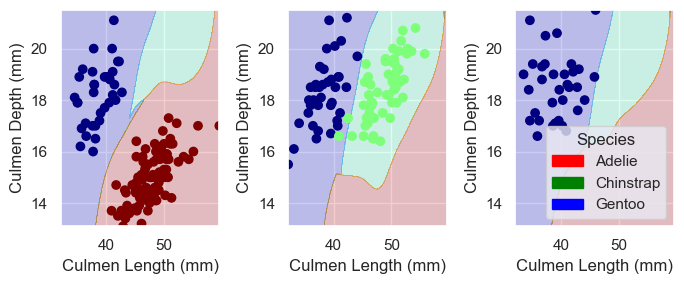

In [86]:
plot_regions(SVC_, X_train[best_features], y_train)
plt.show()

### Summary

Comparing the decision regions of different models, it seems that the errors of the last three models almost exclusively come from the separation between the two species on the second island. There are a few green points right next to the blue ones, which were only correctly classified by logistic regression. 

I can see how this creates a problem for decision tree and random forest -- since they only create separation lines at two directions (along the x axis or y axis), it would be hard for them to be precise where the two clusters are extremely close to each other. 

For the support vector classifier, however, I am curious about what makes it the least accurate, at least for this data set. Is this by nature of some characteristics of this model or just by chance? 